> **Copyright &copy; 2020 CertifAI Sdn. Bhd.**<br>
 **Copyright &copy; 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program and the accompanying materials are made available under the
terms of the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). \
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations
under the License. <br>
<br>**SPDX-License-Identifier: Apache-2.0**

# Pandas Basic

Pandas is built "on top" of NumPy which allows us to work on data easily. Thus, Numpy functions will generally work on pandas objects as well. At first, we will import both libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## DataFrame Class Pt. 1

Here, we will learn some basic operations using Pandas library

### Create new DataFrame

In [2]:
data = [10, 20, 30, 40]
df = pd.DataFrame(data, columns=['numbers'], index=['a', 'b', 'c', 'd']);df

,numbers
a,10
b,20
c,30
d,40


### Typical operations on DataFrame objects

Read all index

In [3]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Determine what are the available columns.

In [4]:
df.columns

Index(['numbers'], dtype='object')

Index slicing using characters or strings.

In [5]:
df.loc['c']

numbers    30
Name: c, dtype: int64

Index slicing using integers.

In [6]:
data = [10, 20, 30, 40]
df_num_idx = pd.DataFrame(data, columns=['numbers'])
df_num_idx.iloc[1:3]

,numbers
1,20
2,30


Sum up every numbers in rows

In [7]:
df.sum()

numbers    100
dtype: int64

Perform numeric operation on each data

In [8]:
df.apply(lambda x: x**2)

,numbers
a,100
b,400
c,900
d,1600


Add a new column to the DataFrame

In [9]:
df['floats']=(1.5, 2.5, 3.5, 4.5);df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


Select the data at specific column

In [13]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

We can also create a new column by using a Dataframe.

In [15]:
df['names'] = pd.DataFrame(['Ali', 'Mutu', 'Lim', 'John'], index=['d', 'b', 'a', 'c']); df

,numbers,floats,names
a,10,1.5,Lim
b,20,2.5,Mutu
c,30,3.5,John
d,40,4.5,Ali


If we want to add a new row to the dataset, we can use append. But do note that this is just a temporary DataFrame and will not affect the original DataFrame.

Here, we show that we can add a new row of data by using a dictionary.

In [20]:
df.append({'numbers':25, 'floats': 24.72, 'names':'Fatimah'}, ignore_index=True)
#temporary object, will not affect the original df
# df

,numbers,floats,names
0,10,1.50,Lim
1,20,2.50,Mutu
2,30,3.50,John
3,40,4.50,Ali
4,25,24.72,Fatimah


Thus, we need to replace the old variable in order to 'replace' it. 

We can append a new row of data using DataFrame as well instead of a dictionary.

In [21]:
df = df.append(pd.DataFrame({'numbers': 10, 'floats': 5.6,'names': 'Henry'}, index=['z']));df

,numbers,floats,names
a,10,1.5,Lim
b,20,2.5,Mutu
c,30,3.5,John
d,40,4.5,Ali
z,10,5.6,Henry


## DataFrame Class Pt. 2

New, we will work on numerical data, add on new feature like DateTimeIndex and do some basic analysis.

First, we can generate some data for us to use.

In [23]:
np.random.seed(123)
gen_data = np.random.standard_normal((9,4))
gen_data.round(6)

array([[-1.085631,  0.997345,  0.282978, -1.506295],
       [-0.5786  ,  1.651437, -2.426679, -0.428913],
       [ 1.265936, -0.86674 , -0.678886, -0.094709],
       [ 1.49139 , -0.638902, -0.443982, -0.434351],
       [ 2.20593 ,  2.186786,  1.004054,  0.386186],
       [ 0.737369,  1.490732, -0.935834,  1.175829],
       [-1.253881, -0.637752,  0.907105, -1.428681],
       [-0.140069, -0.861755, -0.255619, -2.798589],
       [-1.771533, -0.699877,  0.927462, -0.173636]])

We can create a DataFrame directly by using the array object

In [24]:
df = pd.DataFrame(gen_data);df

,0,1,2,3
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186
5,0.737369,1.490732,-0.935834,1.175829
6,-1.253881,-0.637752,0.907105,-1.428681
7,-0.140069,-0.861755,-0.255619,-2.798589
8,-1.771533,-0.699877,0.927462,-0.173636


Next, we can rename all columns

In [25]:
df.columns = [['x1', 'x2', 'x3', 'x4']];df

,x1,x2,x3,x4
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186
5,0.737369,1.490732,-0.935834,1.175829
6,-1.253881,-0.637752,0.907105,-1.428681
7,-0.140069,-0.861755,-0.255619,-2.798589
8,-1.771533,-0.699877,0.927462,-0.173636


To handle with time series data efficiently, we must learn how to use time indices. 

Assume that our data in the four columns correspind to a month-end data, beginning in Jan 2020. We can generate a DateTimeIndex object using date_range as follows:

In [26]:
#periods = number of periods
#freq = frequency, can be weekly, monthly, quaterly or yearly
all_dates = pd.date_range('2020-1-1', periods=9, freq='M'); all_dates

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30'],
              dtype='datetime64[ns]', freq='M')

Previosly, we encountered indices composed of a string and int. For timeseries data, the indices we use is the DateTimeIndex object we generated earlier.

In [27]:
df.index = all_dates; df

,x1,x2,x3,x4
2020-01-31,-1.085631,0.997345,0.282978,-1.506295
2020-02-29,-0.578600,1.651437,-2.426679,-0.428913
2020-03-31,1.265936,-0.866740,-0.678886,-0.094709
2020-04-30,1.491390,-0.638902,-0.443982,-0.434351
2020-05-31,2.205930,2.186786,1.004054,0.386186
2020-06-30,0.737369,1.490732,-0.935834,1.175829
2020-07-31,-1.253881,-0.637752,0.907105,-1.428681
2020-08-31,-0.140069,-0.861755,-0.255619,-2.798589
2020-09-30,-1.771533,-0.699877,0.927462,-0.173636


With Datetime as the index we can select a range of data by a certain range.

In [28]:
gen_data = np.random.standard_normal((24,4))
gen_data.round(6)

dates = pd.date_range('2020-1-1', periods=24, freq='M')
df_twoYears = pd.DataFrame(gen_data, index=dates, columns=['x1', 'x2', 'x3', 'x4']); df_twoYears

,x1,x2,x3,x4
2020-01-31,0.002846,0.688223,-0.879536,0.283627
2020-02-29,-0.805367,-1.727669,-0.390900,0.573806
2020-03-31,0.338589,-0.011830,2.392365,0.412912
2020-04-30,0.978736,2.238143,-1.294085,-1.038788
2020-05-31,1.743712,-0.798063,0.029683,1.069316
2020-06-30,0.890706,1.754886,1.495644,1.069393
2020-07-31,-0.772709,0.794863,0.314272,-1.326265
2020-08-31,1.417299,0.807237,0.045490,-0.233092
2020-09-30,-1.198301,0.199524,0.468439,-0.831155
2020-10-31,1.162204,-1.097203,-2.123100,1.039727


In [29]:
#select data from year 2020
df_twoYears['2020']

,x1,x2,x3,x4
2020-01-31,0.002846,0.688223,-0.879536,0.283627
2020-02-29,-0.805367,-1.727669,-0.390900,0.573806
2020-03-31,0.338589,-0.011830,2.392365,0.412912
2020-04-30,0.978736,2.238143,-1.294085,-1.038788
2020-05-31,1.743712,-0.798063,0.029683,1.069316
2020-06-30,0.890706,1.754886,1.495644,1.069393
2020-07-31,-0.772709,0.794863,0.314272,-1.326265
2020-08-31,1.417299,0.807237,0.045490,-0.233092
2020-09-30,-1.198301,0.199524,0.468439,-0.831155
2020-10-31,1.162204,-1.097203,-2.123100,1.039727


In [30]:
#select data from March to November
df_twoYears['2020-03':'2020-11']

,x1,x2,x3,x4
2020-03-31,0.338589,-0.011830,2.392365,0.412912
2020-04-30,0.978736,2.238143,-1.294085,-1.038788
2020-05-31,1.743712,-0.798063,0.029683,1.069316
2020-06-30,0.890706,1.754886,1.495644,1.069393
2020-07-31,-0.772709,0.794863,0.314272,-1.326265
2020-08-31,1.417299,0.807237,0.045490,-0.233092
2020-09-30,-1.198301,0.199524,0.468439,-0.831155
2020-10-31,1.162204,-1.097203,-2.123100,1.039727
2020-11-30,-0.403366,-0.126030,-0.837517,-1.605963


In [31]:
# select columns
df_twoYears['x1']

2020-01-31    0.002846
2020-02-29   -0.805367
2020-03-31    0.338589
2020-04-30    0.978736
2020-05-31    1.743712
2020-06-30    0.890706
2020-07-31   -0.772709
2020-08-31    1.417299
2020-09-30   -1.198301
2020-10-31    1.162204
2020-11-30   -0.403366
2020-12-31    1.255237
2021-01-31   -0.314758
2021-02-28    2.087113
2021-03-31    0.181035
2021-04-30   -1.084568
2021-05-31    0.642055
2021-06-30   -0.024626
2021-07-31    0.426147
2021-08-31   -0.735217
2021-09-30   -1.370948
2021-10-31   -0.275786
2021-11-30    1.608691
2021-12-31    0.474347
Freq: M, Name: x1, dtype: float64

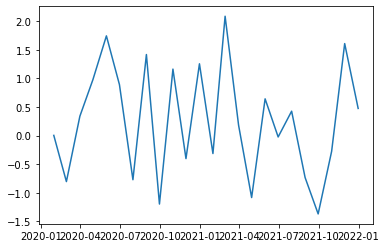

In [32]:
plt.plot(df_twoYears['x1'])
plt.show()

## Basic Analytics

Just like NumPy arrays, we can apply perform multiple operations on the array via DataFrame. We can get row-wise sums, means and cumulative means as follows:

In [35]:
df.sum(axis=0)

x1    0.870911
x2    2.621274
x3   -1.619401
x4   -5.303158
dtype: float64

In [36]:
df.mean()

x1    0.096768
x2    0.291253
x3   -0.179933
x4   -0.589240
dtype: float64

In [37]:
df.cumsum()

,x1,x2,x3,x4
2020-01-31,-1.085631,0.997345,0.282978,-1.506295
2020-02-29,-1.664231,2.648782,-2.143701,-1.935207
2020-03-31,-0.398295,1.782042,-2.822587,-2.029916
2020-04-30,1.093095,1.143140,-3.266569,-2.464268
2020-05-31,3.299025,3.329926,-2.262515,-2.078081
2020-06-30,4.036394,4.820658,-3.198349,-0.902252
2020-07-31,2.782513,4.182906,-2.291244,-2.330933
2020-08-31,2.642444,3.321151,-2.546863,-5.129522
2020-09-30,0.870911,2.621274,-1.619401,-5.303158


There's a shortcut to an often-used statistics for numerical datasets, the describe method:

In [38]:
df.describe()

,x1,x2,x3,x4
count,9.000000,9.000000,9.000000,9.000000
mean,0.096768,0.291253,-0.179933,-0.589240
std,1.387261,1.263003,1.116230,1.170512
min,-1.771533,-0.866740,-2.426679,-2.798589
25%,-1.085631,-0.699877,-0.678886,-1.428681
50%,-0.140069,-0.637752,-0.255619,-0.428913
75%,1.265936,1.490732,0.907105,-0.094709
max,2.205930,2.186786,1.004054,1.175829


In general, we can apply Numpy universal functions to pandas DataFrame objects.

For example:

In [39]:
np.sqrt(df)

,x1,x2,x3,x4
2020-01-31,NaN,0.998672,0.531957,NaN
2020-02-29,NaN,1.285082,NaN,NaN
2020-03-31,1.125138,NaN,NaN,NaN
2020-04-30,1.221225,NaN,NaN,NaN
2020-05-31,1.485237,1.478779,1.002025,0.621439
2020-06-30,0.858702,1.220955,NaN,1.084357
2020-07-31,NaN,NaN,0.952421,NaN
2020-08-31,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,0.963049,NaN


We can plot out the graph easily by using the plot method.

Pandas provide a wrapper around matplotlib (a library that allows us to plot graph), but specifically designed for DataFrame object.

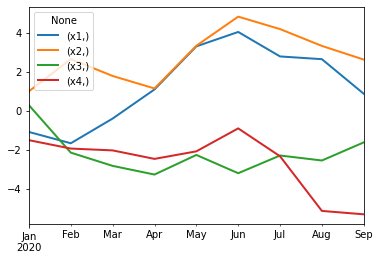

In [40]:
df.cumsum().plot(lw=2.0)
plt.show()

## More on dates and times <I>(Optional)</I>

In this section, we will discuss about the difference between Timestamps and Timespans. But first, let us create dates and times.

In [41]:
# TIMES
rng = pd.date_range('2020 Jan 1', periods = 10, freq = 'D');rng

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

### Timestamp

Each DatetimeIndex consists of Time Stamp

In [42]:
df.index[0]

Timestamp('2020-01-31 00:00:00', freq='M')

We can generate Timestamp by using the following methods.

In [43]:
pd.Timestamp('2020-07-10')

Timestamp('2020-07-10 00:00:00')

In [44]:
# We can include more details 
pd.Timestamp('2020-07-10 10')

Timestamp('2020-07-10 10:00:00')

In [45]:
# Or even more...
pd.Timestamp('2020-07-10 10:15')

Timestamp('2020-07-10 10:15:00')

In [46]:
# we can create Timestamp via datetime.datetime object
pd.Timestamp(2020, 7, 10, 10)

Timestamp('2020-07-10 10:00:00')

With Timestamp we can perform date and time arithmetic with absolute and relative time increments.

In [47]:
#what day is 10th of July 2020?

date = pd.Timestamp('2020-07-10')
date.day_name()

'Friday'

We can also perform arithmetic operation on the Timestamp object.

In [48]:
# add 1 day
friday = date
saturday = friday + pd.Timedelta('1 day')
saturday.day_name()

'Saturday'

In [49]:
# add 1 business day

monday = friday + pd.offsets.BDay()
monday.day_name()

'Monday'

### Timestamp vs Timespans

In [50]:
p = pd.Period('2017-06-13') #timespan
test = pd.Timestamp('2017-06-13 22:11') #timestamp
p.start_time < test < p.end_time

True

### Timespans

Timestamped data is basic type of time series data that associates values with points in time.

In [51]:
pd.Timestamp('2020-07-10')

Timestamp('2020-07-10 00:00:00')

In many cases, it is more natural to associate things like change variables with a time span instead. 
We can think of time span as a period of time between fixed points.
We can represent the span using Period. For example:

In [52]:
#What are the extra details given by the code?
pd.Period('2020-07')

Period('2020-07', 'M')

In [53]:
#How details it can go?
pd.Period('2020-07-10')

Period('2020-07-10', 'D')

In [54]:
pd.Period('2020-07-10 10')

Period('2020-07-10 10:00', 'H')

In [55]:
pd.Period('2020-07-10 10:10')

Period('2020-07-10 10:10', 'T')

In [56]:
pd.Period('2020-07-10 10:10:10')

Period('2020-07-10 10:10:10', 'S')

Arithmetric operations work on Period as well.

In [57]:
pd.Period('2016-01-01 10:10') + pd.Timedelta('2 day')

Period('2016-01-03 10:10', 'T')

Remember how we can create a range of Timestamp using date_range? We can create a range of Periods using period_range

In [59]:
#create a range of periods of 10 business days
prng= pd.period_range('2020-07-10 10:10', freq = 'B', periods = 10);prng

PeriodIndex(['2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15',
             '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21',
             '2020-07-22', '2020-07-23'],
            dtype='period[B]', freq='B')

Indexing with Time Objects

In [60]:
#from previous example, we can create a Series with Timestamp such as follows
rng = pd.date_range('2020 Jul 1', periods = 10, freq = 'D')
rng
ts_idx_timestamp = pd.Series(range(len(rng)), index = rng)
ts_idx_timestamp

2020-07-01    0
2020-07-02    1
2020-07-03    2
2020-07-04    3
2020-07-05    4
2020-07-06    5
2020-07-07    6
2020-07-08    7
2020-07-09    8
2020-07-10    9
Freq: D, dtype: int64

In [61]:
# Sometimes, it makes more sense to think about the index as a time span rather than a single point in time

periods = [pd.Period('2020-01'), pd.Period('2020-02'), pd.Period('2020-03')]
ts_idx_periods = pd.Series(np.random.randn(len(periods)), index = periods)
ts_idx_periods

2020-01   -0.756437
2020-02    0.321687
2020-03    0.760949
Freq: M, dtype: float64

Pandas will convert the Timestamp and Period to DatetimeIndex and PeriodIndex repectively.

In [67]:
type(ts_idx_timestamp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [68]:
type(ts_idx_periods.index)

pandas.core.indexes.period.PeriodIndex

We can convert Timestamp to Period  indices with to_period and vice versa with to_timestamp

In [69]:
ts = pd.Series(range(10), pd.date_range('2020-01-10 8:00', periods = 10, freq = 'H'))
ts

2020-01-10 08:00:00    0
2020-01-10 09:00:00    1
2020-01-10 10:00:00    2
2020-01-10 11:00:00    3
2020-01-10 12:00:00    4
2020-01-10 13:00:00    5
2020-01-10 14:00:00    6
2020-01-10 15:00:00    7
2020-01-10 16:00:00    8
2020-01-10 17:00:00    9
Freq: H, dtype: int64

In [74]:
ts.index

DatetimeIndex(['2020-01-10 08:00:00', '2020-01-10 09:00:00',
               '2020-01-10 10:00:00', '2020-01-10 11:00:00',
               '2020-01-10 12:00:00', '2020-01-10 13:00:00',
               '2020-01-10 14:00:00', '2020-01-10 15:00:00',
               '2020-01-10 16:00:00', '2020-01-10 17:00:00'],
              dtype='datetime64[ns]', freq='H')

In [71]:
ts_period = ts.to_period()
ts_period

2020-01-10 08:00    0
2020-01-10 09:00    1
2020-01-10 10:00    2
2020-01-10 11:00    3
2020-01-10 12:00    4
2020-01-10 13:00    5
2020-01-10 14:00    6
2020-01-10 15:00    7
2020-01-10 16:00    8
2020-01-10 17:00    9
Freq: H, dtype: int64

In [75]:
ts_period.index

PeriodIndex(['2020-01-10 08:00', '2020-01-10 09:00', '2020-01-10 10:00',
             '2020-01-10 11:00', '2020-01-10 12:00', '2020-01-10 13:00',
             '2020-01-10 14:00', '2020-01-10 15:00', '2020-01-10 16:00',
             '2020-01-10 17:00'],
            dtype='period[H]', freq='H')

In [72]:
ts_period['2020-01-10 08:30':'2020-01-10 11:45'] # we have the concept of overlap with time periods

2020-01-10 08:00    0
2020-01-10 09:00    1
2020-01-10 10:00    2
2020-01-10 11:00    3
Freq: H, dtype: int64

In [73]:
ts['2020-01-10 08:30':'2020-01-10 11:45'] # we have the concept of include with timestamps

2020-01-10 09:00:00    1
2020-01-10 10:00:00    2
2020-01-10 11:00:00    3
Freq: H, dtype: int64

## Exercise

We will run through a simple exercise of utilizing Pandas for time series data analysis. 

Tasks that you are required to perform are list down as comment. Please insert your codes below the comment. An approximation of number of lines *n* is provided as a guideline to help you.

### a) DataFrame Class Pt. 1

In [1]:
# import Pandas library (~1 line of code)


# Preparing own data
# create new DataFrame with specified data (~1 line of code)
dataframe = None

# sum up all the observations in 'Data' column (~1 line of code)
sum_of_data = None

# add a new integer column "Multiplier" filled with values 2,4,6,8 (~1 line of code)


# add a new integer column "Product" filled with products of 'Data' and 'Multiplier'  (~1 line of code)


# add a new string column "Fruit" filled with your favourite fruits (~1 line of code)


# sum up all the observations in first row except for 'Fruit' column (~1 line of code)
sum_of_first_row = None

# drop the 'Fruit' column (~1 line of code)


# append a new row of data using Pandas Series or Pandas DataFrame (~1 line of code)
# dataframe = dataframe.append(pd.Series({'Data':5, 'Multiplier':10, 'Product':5*10}, name='e'))


# Add a new float column 'Quotient' by using lambda function to devide 'Product' by 2 (~1 lines of code)


# display info of DataFrame (~1 lines of code)
info = None
print(f'\nDataFrame info is : {info}')

# display column names of DataFrame (~1 lines of code)
columns = None
print(f'\nDataFrame column names are : {columns}')

# display index of Dataframe (~1 lines of code)
index = None
print(f'\nDataFrame index is : {index}')


DataFrame info is : None

DataFrame column names are : None

DataFrame index is : None


In [2]:
# output your result here
dataframe

### b) DataFrame Class Pt. 2

In [3]:
# import NumPy and Pandas (~2 lines of code)



# set random seed 42 for NumPy (~1 lines of code)


# generate a normally distrubted random data of 10 rows and 2 columns (~1 lines of code)
random_data = None

# round them up to just 2 decimal point (~1 lines of code)


# display the type of data structure (~1 lines of code)
data_struct = None
print(f'\n\nData structure is : {data_struct}')

# convert data structure from numpy ndarray to Pandas DataFrame (~1 lines of code)


# display the type of data structure (~1 lines of code)
data_struct = None
print(f'\n\nData structure is : {data_struct}')

# rename the columns of DataFrame (~1 line of code) to your desired names


# Generate a DateTimeIndex object with yearly frequency, starting from 2020 January
# and number of periods matching total rows of our DataFrame (~1 line of code)
date_time_index = None

# Reset the DataFrame index into our date_time_index (~1 line of code)


# Just using loc slicing to retrieve 5 years data starting from 2020 (~1 line of code)
five_years_data = None
print(f'\n\nFive years data is : \n{five_years_data}')

# likewise, iloc slicing to retrieve 5 years data starting from 2020 (~1 line of code)
five_years_data = None
print(f'\n\nFive years data is : \n{five_years_data}')

# for the following, just use the five years data to perform basic analytics
# summation of each columns (~1 line of code)
summations = None

# mean of each columns  (~1 line of code)
means = None

# cummulative sum of each columns (~1 line of code)
cumsums = None

# generate descriptive statistics for each column  (~1 line of code)
descriptive_stats = None

print(f"\n\nSummation is:\n{summations} \n\nMean is:\n{means} \n\nCumulative sum is:\n{cumsums} \n\nDescriptive statistics is: \n{descriptive_stats}")



Data structure is : None


Data structure is : None


Five years data is : 
None


Five years data is : 
None


Summation is:
None 

Mean is:
None 

Cumulative sum is:
None 

Descriptive statistics is: 
None


In [4]:
# you can display your object here
random_data

## References

1. Python for Finance (2014), Yves Hilpisch
2. https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython/blob/master/1.%20Dates%20%26%20Times.ipynb